## Esercitazione 7 -  9 Aprile 2024

Scrivere la function `NewtonRaphson_corde.py`, che implementa il metodo di Newton-Raphson con la variante delle corde
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def newton_corde(fname,Jac,x0,tolx,tolf,nmax):
    fx0=fname(x0)
    matjac=Jac(x0)
    if np.linalg.det(matjac)==0:
        print("determinante nullo")
        return None,None,None
    s=np.linalg.solve(matjac,fx0)
    x1=x0-s
    fx1=fname(x0)
    it=1
    Xm=[np.linalg.norm(s,1)/np.linalg.norm(x1,1)]

    while it<nmax and np.linalg.norm(s,1)/np.linalg.norm(x1,1)>=tolx and np.linalg.norm(fx1)>=tolf:
        x0=x1
        fx0=fname(x0)
        s=np.linalg.solve(matjac,fx0)
        x1=x0-s
        fx1=fname(x0)
        it+=1
        Xm.append(np.linalg.norm(s,1)/np.linalg.norm(x1,1))
    return x1,it,Xm

Scrivere la function `NewtonRaphson_sham.py`, che implementa il metodo di Newton-Raphson con la variante di Shamanskii
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.

In [4]:
def newton_sham(fname,Jac,x0,tolx,tolf,nmax):
    fx0=fname(x0)
    matjac=Jac(x0)
    if np.linalg.det(matjac)==0:
        print("determinante matrice nulla")
        return None,None,None
    s=np.linalg.solve(matjac,fx0)
    x1=x0-s
    fx1=fname(x1)
    Xm=[np.linalg.norm(s,1)/np.linalg.norm(x1,1)]
    it=1
    m=10

    while it<nmax and np.linalg.norm(s,1)/np.linalg.norm(x1,1)>=tolx and np.linalg.norm(fx1)>=tolf:
        x0=x1
        fx0=fname(x0)
        if it%m==0:
            matjac=Jac(x0)
            if np.linalg.det(matjac)==0:
                print("determinante matrice nulla")
                return None,None,None
    
        s=np.linalg.solve(matjac,fx0)
        x1=x0-s
        fx1=fname(x1)
        Xm.append(np.linalg.norm(s,1)/np.linalg.norm(x1,1))
        it+=1

    return x1,it,Xm

Risolvere i seguenti tre sistemi non lineari:
1) 
2x0-cos(x1)=0

sin(x0)+2x1=0

2) 
x0^2+x1^2-9=0

x0^2+x1*2-2=0

3) 
4x0^2+x_1^2^=4

x0+x1=sin(x0-x1)

utilizzando il metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii.
Confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi.

In [5]:
f = lambda x: np.array([
    2*x[0]-np.cos(x[1]),
    np.sin(x[0])+2*x[1]
])

Jac = lambda x: np.array([
    [2,np.sin(x[1])],
    [np.cos(x[0]),2]
])

x0=np.array([-1,1])
nmax=500
x_c,it_c,xm_c=newton_corde(f,Jac,x0,1e-12,1e-12,nmax)
x_s,it_s,xm_s=newton_sham(f,Jac,x0,1e-12,1e-12,nmax)

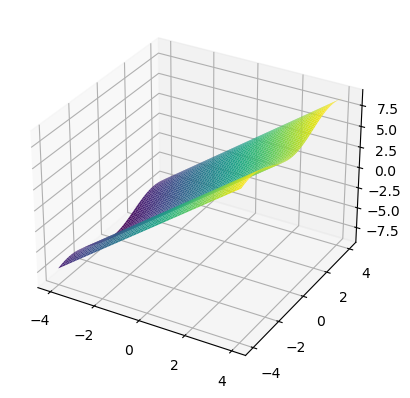

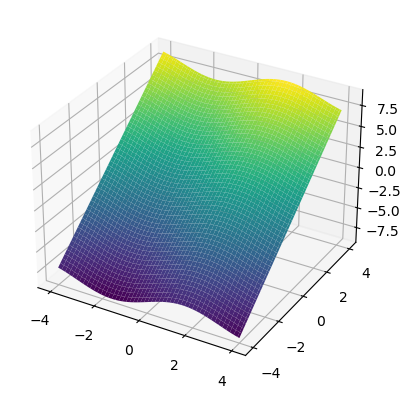

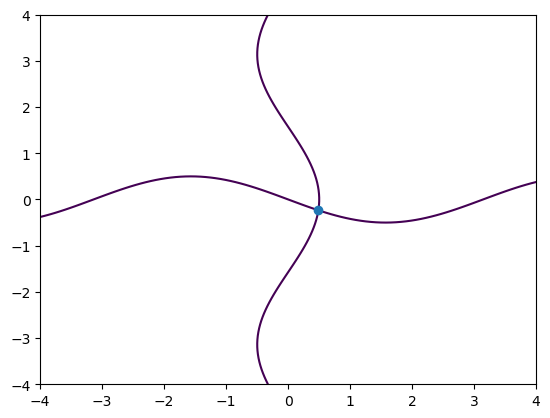

In [6]:
import numpy.linalg as npl
from mpl_toolkits.mplot3d import Axes3D

x=np.linspace(-4,4,100)
y=np.linspace(-4,4,100)
X,Y = np.meshgrid(x,y)
Z=2*X-np.cos(Y)
Z1=np.sin(X)+2*Y

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,cmap=plt.cm.viridis)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z1,cmap=plt.cm.viridis)
plt.show()

plt.contour(X,Y,Z, levels=[0])
plt.contour(X,Y,Z1, levels=[0])
#plt.plot(x_c[0],x_c[1],'o')
plt.plot(x_s[0],x_s[1],'o')
plt.show()

## Esercizio 2
Scrivere la function `NewtonRaphson_minimo.py`, che implementa il metodo di Newton-Raphson con la variante delle corde
per il calcolo del minimo assoluto (relativo) di una funzione non lineare.

    Tale function
deve assumere come dati in input:
- grad_name: nome della  funzione vettoriale  che contine il gradiente della funzione di cui calcolare lo zero;
- Hess_name: nome della funzione che calcola l' Hessiana della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.



In [7]:
def newton_minimo(grad,hess,x0,tolx,tolf,nmax):
    gfx0=grad(x0)
    hfx0=hess(x0)
    if np.linalg.det(hfx0)==0:
        print("La matrice Hessiana calcolata nell'iterato precedente non è a rango massimo")
        return None, None, None
    s = np.linalg.solve(hfx0,gfx0)
    x1=x0-s
    gfx1=grad(x1)
    it=1
    Xm=[np.linalg.norm(s,1)]

    while it<nmax and np.linalg.norm(s,1)/np.linalg.norm(x1)>=tolx and np.linalg.norm(gfx1)>=tolf:
        x0=x1
        gfx0=grad(x0)
        hfx0=hess(x0)
        if np.linalg.det(hfx0)==0:
            print("La matrice Hessiana calcolata nell'iterato precedente non è a rango massimo")
            return None, None, None
        s = np.linalg.solve(hfx0,gfx0)
        x1=x0-s
        gfx1=grad(x1)
        it+=1
        Xm.append(np.linalg.norm(s,1))

    return x1,it,Xm


minimo in [1. 1.] in 5 iterazioni


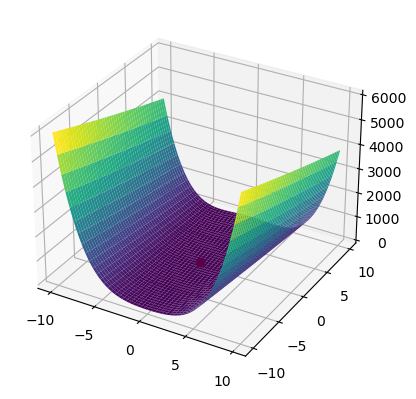

In [11]:
f1 = lambda x: 0.5*(0.001*(x[0]-1)**2+(x[0]**2-x[1])**2)


grad1 = lambda x: np.array([
    0.001*x[0]-0.001+4*x[0]**3-4*x[0]*x[1],
    2*x[0]**2-2*x[1]
])

hess1= lambda x: np.array([
    [0.001+12*x[0]**2-4*x[1], -4*x[0]],
    [4*x[0], -2]
])

x=np.arange(-10.0,10.0,0.1)
y=np.arange(-10.0,10.0,0.1)
X,Y = np.meshgrid(x,y)
Z=0.5*(0.001*(X-1)**2+(X**2-Y)**2)
x0=np.array([-10.0,5.0])
nmax=500

x_min, it_min, Xm_min = newton_minimo(grad1,hess1,x0,1e-12,1e-12,nmax)
print("minimo in",x_min, "in", it_min, "iterazioni")

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,cmap=plt.cm.viridis)
plt.plot(0.0,0.0,f1(np.array(x_min)),'ro')

minimo in [ 1. -1.] in 28 iterazioni


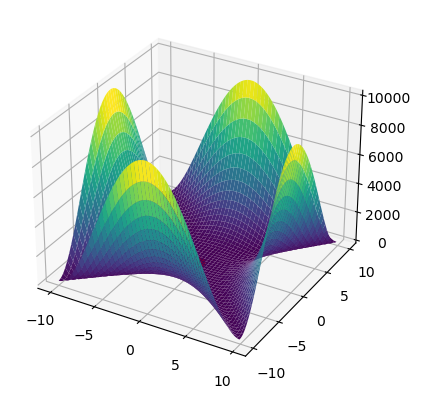

In [13]:
f2 = lambda x: (x[0]**2-x[1]**2)**2+(x[0]-1)**2

grad2= lambda x: np.array([
    4*x[0]**3-4*x[0]*x[1]**2+2*x[0]-2,
    -4*x[0]**2*x[1]+4*x[1]**3
])

hess2= lambda x: np.array([
    [12*x[0]**2-4*x[1]**2+2,-8*x[0]*x[1]],
    [-8*x[0]*x[1],-4*x[0]**2+12*x[1]**2]
])
x0=np.array([-10.0,5.0])
nmax=500

x2_min, it2_min, Xm2_min = newton_minimo(grad2,hess2,x0,1e-12,1e-12,nmax)
print("minimo in",x2_min, "in", it2_min, "iterazioni")
x=np.arange(-10.0,10.0,0.1)
y=np.arange(-10.0,10.0,0.1)
X,Y = np.meshgrid(x,y)
Z=(X**2-Y**2)**2+(X-1)**2
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,cmap=plt.cm.viridis)
plt.plot(0.0,0.0,f2(np.array(x2_min)),'ro')

In [29]:
def my_newton_minimo_MOD(gradiente, Hess, x0, tolx, tolf, nmax):
  matHess = np.array([[Hess[0, 0](x0[0], x0[1]), Hess[0, 1](x0[0], x0[1])],
                      [Hess[1, 0](x0[0], x0[1]), Hess[1, 1](x0[0], x0[1])]])
 

  gradiente_x0=np.array([gradiente[0](x0[0], x0[1]),gradiente[1](x0[0], x0[1])])
   
  if np.linalg.det(matHess) == 0:
    print("La matrice Hessiana calcolata nell'iterato precedente non è a rango massimo")
    return None, None, None
      
  s = -np.linalg.solve(matHess, gradiente_x0)
  # Aggiornamento della soluzione
  it = 1
  x1 = x0 + s
  grad_fx1=np.array([gradiente[0](x1[0],x1[1]),gradiente[1](x1[0],x1[1])])
  Xm = [np.linalg.norm(s, 1)]
  
  while it <= nmax and np.linalg.norm(grad_fx1, 1) >= tolf and np.linalg.norm(s, 1) >= tolx * np.linalg.norm(x1, 1):
     
    x0 = x1
    it += 1
    matHess = np.array([[Hess[0, 0](x0[0], x0[1]), Hess[0, 1](x0[0], x0[1])],
                      [Hess[1, 0](x0[0], x0[1]), Hess[1, 1](x0[0], x0[1])]])
    grad_fx0=grad_fx1
      
    if np.linalg.det(matHess) == 0:
      print("La matrice Hessiana calcolata nell'iterato precedente non è a rango massimo")
      return None, None, None
      

    # Risolvo il sistema lineare avente come matrice dei coefficienti la
    # matrice Hessiana e come termine il vettore gradiente calcolato nell'iterato precedente
    # in x0
                #NB: in fx1 è memorizzato il gradiente nell'iterato attuale
    s = -np.linalg.solve(matHess, grad_fx0)
     
    # Aggiornamento della soluzione
    x1 = x0 + s
    #Aggiorno il gradiente per la prossima iterazione 
    grad_fx1=np.array([gradiente[0](x1[0],x1[1]),gradiente[1](x1[0],x1[1])])
    Xm.append(np.linalg.norm(s, 1))

  return x1, it, Xm

minimo in [-4.17330795  3.99792979] in 5 iterazioni


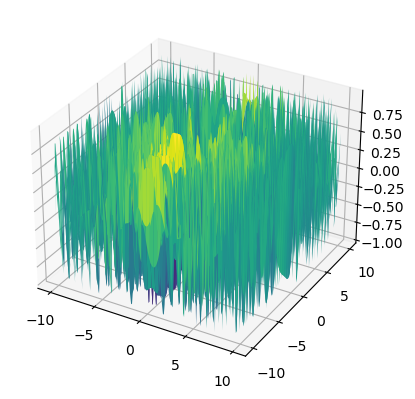

In [30]:
import sympy as sym
from sympy.utilities.lambdify import lambdify
x=sym.symbols('x[0]')
y=sym.symbols('x[1]')
f3 = sym.sin(x**2/2-y**2/4)*sym.cos(2*x-sym.exp(y))
fp = lambdify((x,y),f3,np)
dxf3=sym.diff(f3,x,1)
dyf3=sym.diff(f3,y,1)
dxdxf3=sym.diff(dxf3,x,1)
dxdyf3=sym.diff(dxf3,y,1)
dydxf3=sym.diff(dyf3,x,1)
dydyf3=sym.diff(dyf3,y,1)

gradf3= np.array([
    lambdify((x,y),dxf3,np),
    lambdify((x,y),dyf3,np)
    ])

hessf3 = np.array([
    [lambdify((x,y),dxdxf3,np),lambdify((x,y),dxdyf3,np)],
    [lambdify((x,y),dydxf3,np),lambdify((x,y),dydyf3,np)]
])

x0=np.array([-4.0,4.0])
nmax=100
x3_min, it3_min, Xm3_min = my_newton_minimo_MOD(gradf3,hessf3,x0,1e-12,1e-12,nmax)
print("minimo in",x3_min, "in", it3_min, "iterazioni")

x=np.arange(-10.0,10.0,0.1)
y=np.arange(-10.0,10.0,0.1)
X,Y=np.meshgrid(x,y)
Z=np.sin(X**2/2-Y**2/4)*np.cos(x*X-np.exp(Y))
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,cmap=plt.cm.viridis)
plt.plot(0.0,0.0,fp(x3_min[0],x3_min[1]),'ro')

## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [31]:
def norm_1_vec(xk):
    sum=np.sum(np.abs(xk))
    return np.max(sum)

In [32]:
def norm_inf_vec(xk):
    return np.max(xk)

In [33]:
def norm_1_matr(A):
    sum=np.sum(np.abs(A),axis=0)
    return np.max(sum)

In [34]:
def norm_inf_matr(A):
    sum=np.sum(np.abs(A),axis=1)
    return np.max(sum)

In [51]:
def norm_2_matr(A):
    M=A.T@A
    autoval = np.linalg.eigvals(M)
    return np.sqrt(np.max(autoval))

In [52]:
A=np.array([[4.0,-1.0,6.0],[2.0,3.0,-3.0],[1.0,-2.0,4.5]])
print("norma 1 di A", norm_1_matr(A),np.linalg.norm(A,1))
print("norma infinito di A", norm_inf_matr(A),np.linalg.norm(A,np.inf))
print("norma 2 di A", norm_2_matr(A), np.linalg.norm(A,2))

norma 1 di A 13.5 13.5
norma infinito di A 11.0 11.0
norma 2 di A 9.056251013341882 9.056251013341878


## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg